In [194]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing

from keras.models import Model
from keras.layers import Input, Embedding, Dense, Concatenate

import os
import time

from tensorflow import keras
import tensorflow as tf

# importing the sequential model
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout, Embedding, Flatten, Concatenate
from keras.optimizers import Adam

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [195]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


.info() => presents detailed information of each feature.
- null values
- data type
- total entries
- amount of columns
<br><br>
example of data type meanings:<br>
<br>

| Dtype    | Description                                               |
| -------- | --------------------------------------------------------- |
| object   | category, unique ids                                      |
| float64  | numerical values                                          |
| int64    | encoded categories, numerical values (this case: years)   |

In [197]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In the column **Item_Fat_Content**, there are 5 unique values. These would be encoded as 5 different categories. <br>
Although if you take a closer look at the values there are actually only two main categories, which are 'Low Fat' and 'Regular'.

In [198]:
# replace wrongly spelled values to uniformed values
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Next step would be to have a look at the null values. <br>
<br>
Where you can see that to features contain null values:
- Item_Weight                   818
- Outlet_Size                  1439

In [199]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [200]:
# analysing the data
df[:15]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### analyse how to fill nan of Item_Weight
---
each item has a specific weight. We will fill the values based on the information we get from **Item_Identifier**. <br>
since multiple stores have the same items available

In [201]:
df.loc[df['Item_Identifier'] == 'FDP10'] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086


In [202]:
# fill item weight Item_Weight missing values with equal Item_Identifier values
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))


In [203]:
df.loc[df['Item_Identifier'] == 'FDP10'] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086


In [204]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                    35
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

the rest of the missing values will be filled with the mean of the same Item_Type

In [205]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<Axes: xlabel='Item_Type'>

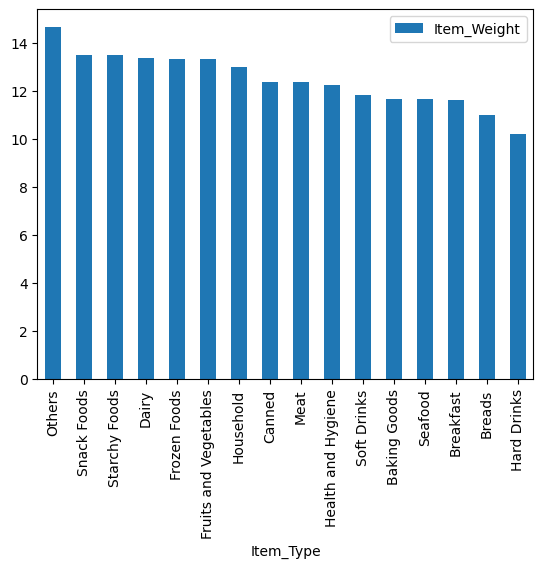

In [206]:
# plot the groupby data
df.groupby('Item_Type').median('Item_Weight')[['Item_Weight']].sort_values(by='Item_Weight', ascending=False).plot(kind='bar')

the conclusion of the analysis would be that it is a reasonable idea to fill nan values based on the item type 

In [207]:
# for loop to fill the missing values

# get the unique values of the item type
typeOfItem = df.Item_Type.unique()

# loop through all the unique values
for i in typeOfItem:
    # get the data frame of the unique value
    x = df[df['Item_Type'].str.contains(i)]
    # fill the missing values with the mean of the item type
    x.Item_Weight.fillna(x.Item_Weight.mean(), inplace=True)
    # fill the missing values in the original data frame
    df.loc[df['Item_Type'].str.contains(i), 'Item_Weight'] = x.Item_Weight

df.head()

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_39001/3669760417.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Item_Weight.fillna(x.Item_Weight.mean(), inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [208]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

next step is handling the Outlet_Size nan values

In [209]:
# look at the unique values of the outlet size
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [210]:
# unique values of the outlet location type
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [211]:
# amount of missing values in the outlet size based on the outlet location type
df[df['Outlet_Size'].isnull()].Outlet_Location_Type.value_counts()

Tier 2    1111
Tier 3     328
Name: Outlet_Location_Type, dtype: int64

In [212]:
# amount of missing values in the outlet size based on the outlet type
df[df['Outlet_Size'].isnull()].Outlet_Type.value_counts()

Supermarket Type1    1111
Grocery Store         328
Name: Outlet_Type, dtype: int64

In [213]:
# amount of missing values in the outlet size based on the outlet identifier
df[df['Outlet_Size'].isnull()].Outlet_Identifier.value_counts()

OUT045    569
OUT017    542
OUT010    328
Name: Outlet_Identifier, dtype: int64

In [214]:
# first combination will be based on the Tier 2 location and Type is Supermarket Type1
df_comb1 = df[df['Outlet_Location_Type'].str.contains('Tier 2')& df['Outlet_Type'].str.contains('Supermarket Type1')]
df_comb1.Outlet_Size.fillna('Small', inplace=True)
df.loc[df['Outlet_Location_Type'].str.contains('Tier 2'), 'Outlet_Size'] = df_comb1.Outlet_Size

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_39001/641000088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb1.Outlet_Size.fillna('Small', inplace=True)


In [215]:
df[100:110]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
100,FDT28,13.300,Low Fat,0.063695,Frozen Foods,151.0708,OUT045,2002,Small,Tier 2,Supermarket Type1,1805.6496
101,FDD10,20.600,Regular,0.045798,Snack Foods,178.5344,OUT027,1985,Medium,Tier 3,Supermarket Type3,2854.9504
102,FDW57,8.310,Regular,0.115857,Snack Foods,179.1028,OUT049,1999,Medium,Tier 1,Supermarket Type1,3896.2616
103,DRB48,16.750,Regular,0.024833,Soft Drinks,38.7822,OUT013,1987,High,Tier 3,Supermarket Type1,667.7974
104,FDP09,19.750,Low Fat,0.034028,Snack Foods,212.0902,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.8530
105,FDH14,17.100,Regular,0.046770,Canned,141.1838,OUT013,1987,High,Tier 3,Supermarket Type1,2247.7408
106,FDA47,10.500,Regular,0.116577,Baking Goods,163.1210,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310
107,FDG12,6.635,Regular,0.000000,Baking Goods,121.3098,OUT045,2002,Small,Tier 2,Supermarket Type1,2530.7058
108,DRE60,9.395,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
109,DRK49,14.150,Low Fat,0.035914,Soft Drinks,41.4138,OUT013,1987,High,Tier 3,Supermarket Type1,812.2760


In [216]:
# we can see that all the Grocery Store are of small size
df[df['Outlet_Type'].str.contains('Grocery Store')].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [217]:
# where as if the location type is Tier 3 then the size is High or Medium
df[df['Outlet_Location_Type'].str.contains('Tier 3')].Outlet_Size.unique()

array(['Medium', nan, 'High'], dtype=object)

In [218]:
df[df['Outlet_Size'].isnull()].Outlet_Identifier.value_counts()

OUT010    328
Name: Outlet_Identifier, dtype: int64

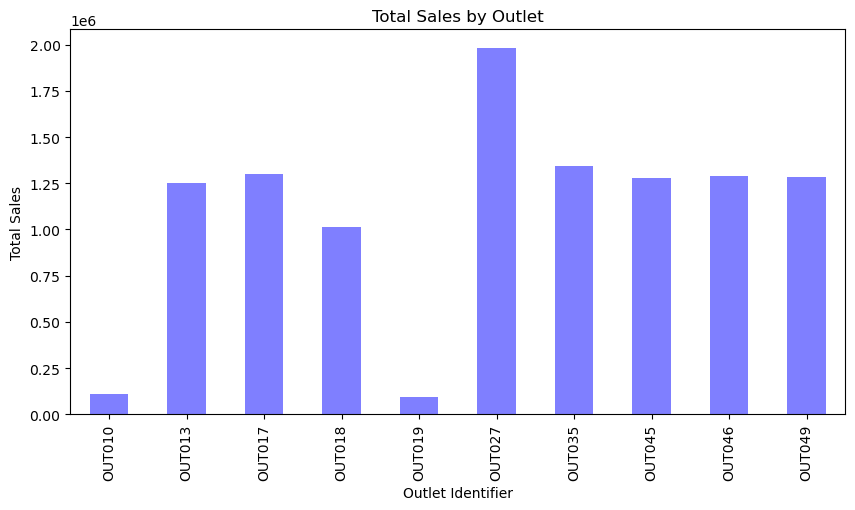

In [219]:
# group df by Outlet_Identifier and calculate the total Item_Outlet_Sales

df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().plot(kind='bar', figsize=(10,5), color='blue', alpha=0.5)
plt.title('Total Sales by Outlet')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Identifier')
plt.show()

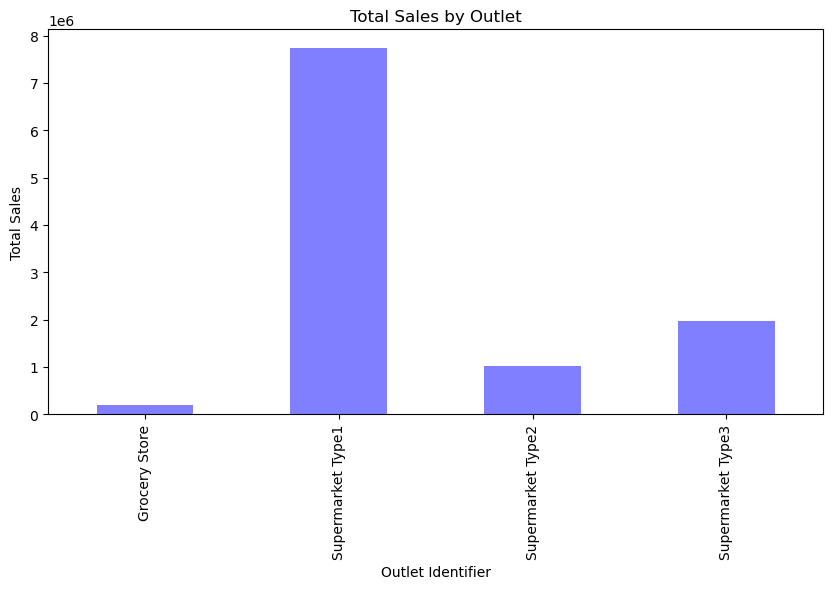

In [220]:
# group df by Outlet_Identifier and calculate the total Item_Outlet_Sales, print the Outlet_Size next to it

df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot(kind='bar', figsize=(10,5), color='blue', alpha=0.5)
plt.title('Total Sales by Outlet')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Identifier')
plt.show()

In [221]:
# OUT010 are all empty
df[df['Outlet_Identifier'].str.contains('OUT010')].Outlet_Size.unique()

array([nan], dtype=object)

In [222]:
df[df['Outlet_Type'].str.contains('Grocery Store')].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [223]:
df_comb2 = df[df['Outlet_Identifier'].str.contains('OUT010')]
df_comb2.Outlet_Size.fillna('Small', inplace=True)
df.loc[df['Outlet_Identifier'].str.contains('OUT010'), 'Outlet_Size'] = df_comb2.Outlet_Size

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_39001/3356496212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb2.Outlet_Size.fillna('Small', inplace=True)


In [224]:
# all null values are filled
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [225]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [226]:
# drop the Item_Identifier, since it is not required
df = df.drop(['Item_Identifier'], axis=1)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [227]:
# Label Encoding
le = LabelEncoder()
# df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
# df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
# df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
# df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])

df.head()

# Repeat for other categorical columns

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,6,182.0950,0,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


In [228]:
scaler = MinMaxScaler()
df[['Item_Type', 'Outlet_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']] = scaler.fit_transform(df[['Item_Type', 'Outlet_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.048866,0.266667,0.927507,1.000000,0.583333,Medium,Tier 1,Supermarket Type1,0.324387
1,0.081274,Regular,0.058705,0.933333,0.072068,0.333333,1.000000,Medium,Tier 3,Supermarket Type2,0.035939
2,0.770765,Low Fat,0.051037,0.666667,0.468288,1.000000,0.583333,Medium,Tier 1,Supermarket Type1,0.180863
3,0.871986,Regular,0.000000,0.400000,0.640093,0.000000,0.541667,Small,Tier 3,Grocery Store,0.061260
4,0.260494,Low Fat,0.000000,0.600000,0.095805,0.111111,0.083333,High,Tier 3,Supermarket Type1,0.084247


In [229]:
# creating dummy variables for categorical variables
df_encoded = pd.get_dummies(df)

df_encoded.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.266667,0.927507,1.000000,0.583333,0.324387,1,0,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.933333,0.072068,0.333333,1.000000,0.035939,0,1,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.666667,0.468288,1.000000,0.583333,0.180863,1,0,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.400000,0.640093,0.000000,0.541667,0.061260,0,1,0,0,1,0,0,1,1,0,0,0
4,0.260494,0.000000,0.600000,0.095805,0.111111,0.083333,0.084247,1,0,1,0,0,0,0,1,0,1,0,0


In [230]:
df_encoded.shape

(5000, 19)

In [231]:
X = df_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = df_encoded[['Item_Outlet_Sales']]

X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.266667,0.927507,1.000000,0.583333,1,0,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.933333,0.072068,0.333333,1.000000,0,1,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.666667,0.468288,1.000000,0.583333,1,0,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.400000,0.640093,0.000000,0.541667,0,1,0,0,1,0,0,1,1,0,0,0
4,0.260494,0.000000,0.600000,0.095805,0.111111,0.083333,1,0,1,0,0,0,0,1,0,1,0,0


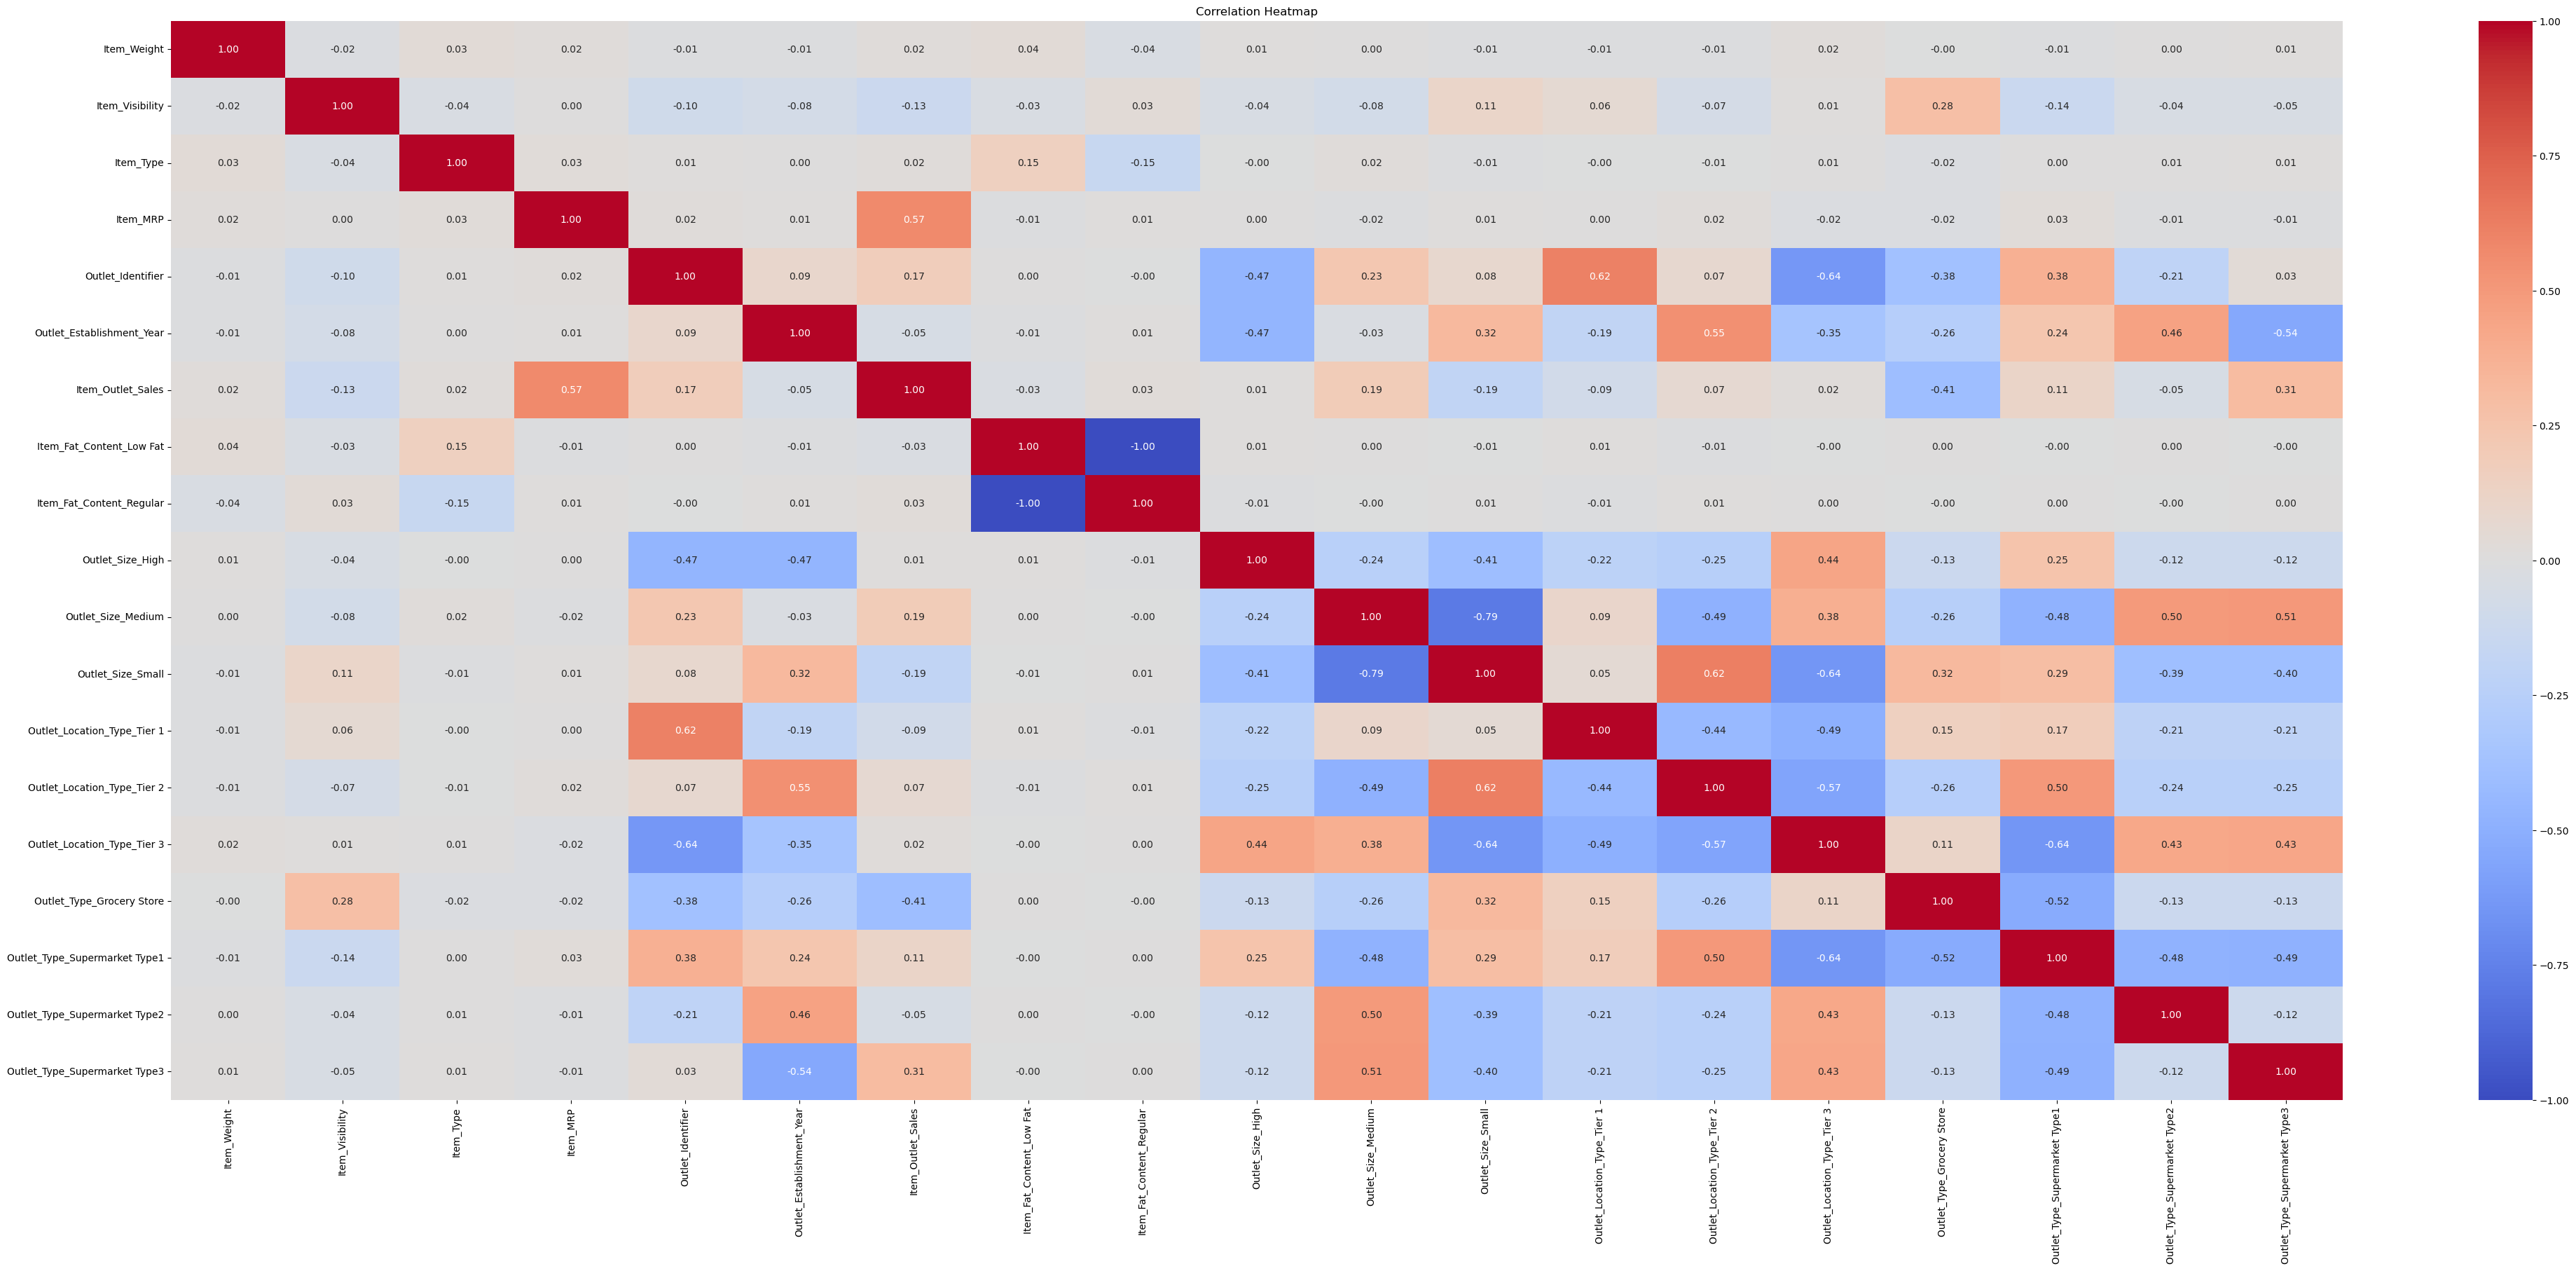

In [233]:
# # Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [309]:
# get the correlation of the features in the dataset of Item_Outlet_Sales
features = df_encoded.corr()['Item_Outlet_Sales'].sort_values(ascending=False)
best_features = [item for item in features.index if item != 'Item_Outlet_Sales' and features[item] > 0.25 or features[item] < -0.25]
best_features

['Item_MRP', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Grocery Store']

In [310]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[best_features], y, test_size=0.2, random_state=42)
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 3), (4000, 1)), ((1000, 3), (1000, 1)))

In [307]:
import os
import time

def createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate):
    model = Sequential()
    model.add(Dense(units=numNeurons, input_dim=inputNeurons, activation='relu'))
    for i in range(numHiddLayers):
        model.add(Dense(units=numNeurons/2, activation='relu'))
        # model.add(Dense(units=numNeurons, activation='relu'))

    model.add(Dense(units=outputNeurons))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learningRate), metrics=['mse'])
    return model

def createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime):
    logEntry = pd.DataFrame([[inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime]],
                            columns=['inputNeurons', 'outputNeurons', 'numHiddLayers', 'numNeurons', 'learningRate', 'epochs', 'r2Score', 'mse', 'loss', 'batchSize', 'runTime'])

    # save the log entry to CSV with header, and append new entries without rewriting the file, with only one header
    if not os.path.isfile('final_logs.csv'):
        logEntry.to_csv('final_logs.csv', index=False, header=True, mode='a')
    else:
        # Append without writing the header
        logEntry.to_csv('final_logs.csv', index=False, header=False, mode='a')

    return logEntry

def fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize):
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batchSize)
    return model_history

def evaluateModel(model, X_test, y_test):
    loss, mse = model.evaluate(X_test, y_test)
    return loss, mse

def predictModel(model, X_test):
    with tf.device('/GPU:0'):
        y_pred = model.predict(X_test)
    return y_pred

def calculateR2Score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def plotModelHistory(model_history):
    # summarize history for loss
    plt.plot(model_history.history['mse'])
    plt.plot(model_history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def runModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, batchSize):
    start_time = time.time()
    
    model = createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate)
    model_history = fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize)
    loss, mse = evaluateModel(model, X_test, y_test)
    y_pred = predictModel(model, X_test)
    r2Score = calculateR2Score(y_test, y_pred)
    plotModelHistory(model_history)
    
    end_time = time.time()
    run_time = end_time - start_time
    
    return createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, run_time)



Epoch 1/800
32/32 [==============================] - 1s 8ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 2/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 3/800
32/32 [==============================] - 0s 5ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 4/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 5/800
32/32 [==============================] - 0s 5ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 6/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 7/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 8/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0101 - m

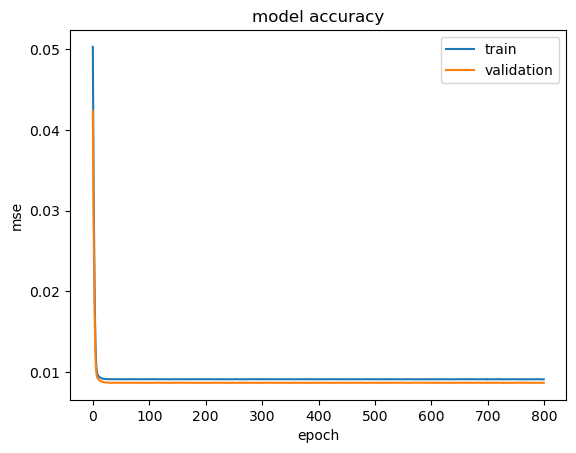

,inputNeurons,outputNeurons,numHiddLayers,numNeurons,learningRate,epochs,r2Score,mse,loss,batchSize,runTime
0,3,1,3,512,0.00001,800,0.610577,0.008633,0.008633,128,116.339099


In [312]:
runModel(inputNeurons=X_train.shape[1], outputNeurons=1, numHiddLayers=3, numNeurons=512, learningRate=0.00001, epochs=800, batchSize=128)